# Project Data Analytics: Brazilian E-Commerce Public Dataset by Olist
 - <b> Nama        : Devina Averilia
 - <b> Email       : devina.averilia04@gmail.com
 - <b> ID Dicoding : Devina Averilia

# Menentukan Pertanyaan bisnis
1. Apa produk yang memiliki penjualan tertinggi dan terendah?
2. Bagaimana gambaran demografis dari basis pelanggan kami?


# Import Semua Packages/Library yang Digunakan

In [115]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import urllib
import unidecode
import matplotlib.image as mpimg

# Data Wrangling

1. Baca data pelanggan dan simpan ke variabel customers_df

In [116]:
customers_df = pd.read_csv("https://raw.githubusercontent.com/lmaoyups/bright/main/orders_dataset.csv")
customers_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


2. Baca data geolokasi dan simpan ke variabel geolocation_df

In [117]:
geolocation_df = pd.read_csv("https://raw.githubusercontent.com/lmaoyups/Submission/master/data/geolocation_dataset.csv")
geolocation_df.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


3. Baca data item pesanan dan simpan ke variabel order_items_df

In [118]:
order_items_df = pd.read_csv("https://raw.githubusercontent.com/lmaoyups/bright/main/order_items_dataset.csv")
order_items_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


4. Baca data pembayaran pesanan dan simpan ke variabel order_pembayaran_df

In [119]:
order_payments_df = pd.read_csv("https://raw.githubusercontent.com/lmaoyups/bright/main/order_payments_dataset.csv")
order_payments_df.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


5. Baca data ulasan pesanan dan simpan ke variabel order_reviews_df

In [120]:
order_reviews_df = pd.read_csv("https://raw.githubusercontent.com/lmaoyups/bright/main/order_reviews_dataset.csv")
order_reviews_df.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


6. Baca data pesanan dan simpan ke variabel orders_df

In [121]:
orders_df = pd.read_csv("https://raw.githubusercontent.com/lmaoyups/bright/main/orders_dataset.csv")
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


7. Baca data produk dan simpan ke variabel products_df

In [122]:
products_df = pd.read_csv("https://raw.githubusercontent.com/lmaoyups/bright/main/products_dataset.csv")
products_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


8. Baca data nama kategori produk dan simpan ke variabel product_category_name_df

In [123]:
product_category_name_df = pd.read_csv("https://raw.githubusercontent.com/lmaoyups/bright/main/product_category_name_translation.csv")
product_category_name_df.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


9. Baca data penjual dan simpan ke variabel sellers_df

In [124]:
sellers_df = pd.read_csv("https://raw.githubusercontent.com/lmaoyups/bright/main/sellers_dataset.csv")
sellers_df.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


# Assessing Data

Menilai Data

In [125]:
print('\n', customers_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB

 None


In [126]:
print('\n', geolocation_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB

 None


In [127]:
print('\n', order_items_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB

 None


In [128]:
print('\n', order_payments_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB

 None


In [129]:
print('\n', order_reviews_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB

 None


In [130]:
print('\n', orders_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB

 None


In [131]:
print('\n', product_category_name_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB

 None


In [132]:
print('\n', products_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB

 None


In [133]:
print('\n', sellers_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB

 None


Cek ata Null setiap DataFrame

In [134]:
print('\nInfo data null customers:\n', customers_df.isnull().sum())


Info data null customers:
 order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64


In [135]:
print('\nInfo data null geolocation:\n', geolocation_df.isnull().sum().sort_values(ascending=False))


Info data null geolocation:
 geolocation_zip_code_prefix    0
geolocation_lat                0
geolocation_lng                0
geolocation_city               0
geolocation_state              0
dtype: int64


In [136]:
print('\nInfo data null order items:\n', order_items_df.isnull().sum())


Info data null order items:
 order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64


In [137]:
print('\nInfo data null order payments:\n', order_payments_df.isnull().sum().sort_values(ascending=False))


Info data null order payments:
 order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64


In [138]:
print('\nInfo data null order reviews:\n', order_reviews_df.isnull().sum().sort_values(ascending=False))


Info data null order reviews:
 review_comment_title       87656
review_comment_message     58247
review_id                      0
order_id                       0
review_score                   0
review_creation_date           0
review_answer_timestamp        0
dtype: int64


In [139]:
print('\nInfo data null orders:\n', orders_df.isnull().sum().sort_values(ascending=False)
)



Info data null orders:
 order_delivered_customer_date    2965
order_delivered_carrier_date     1783
order_approved_at                 160
order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_estimated_delivery_date       0
dtype: int64


In [140]:
print('\nInfo data null product category:\n', product_category_name_df.isnull().sum().sort_values(ascending=False))


Info data null product category:
 product_category_name            0
product_category_name_english    0
dtype: int64


In [141]:
print('\nInfo data null products:\n',products_df.isnull().sum().sort_values(ascending=False))


Info data null products:
 product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
product_id                      0
dtype: int64


In [142]:
print('\nInfo data null sellers:\n', sellers_df.isnull().sum().sort_values(ascending=False))


Info data null sellers:
 seller_id                 0
seller_zip_code_prefix    0
seller_city               0
seller_state              0
dtype: int64


Cek data duplikat setiap DataFrame

In [143]:
print('Jumlah duplikasi customers:', customers_df.duplicated().sum())
print('Jumlah duplikasi geolocation:', geolocation_df.duplicated().sum())
print('Jumlah duplikasi order items:', order_items_df.duplicated().sum())
print('Jumlah duplikasi order payments:', order_payments_df.duplicated().sum())
print('Jumlah duplikasi order reviews:', order_reviews_df.duplicated().sum())
print('Jumlah duplikasi orders:', orders_df.duplicated().sum())
print('Jumlah duplikasi product category:', product_category_name_df.duplicated().sum())
print('Jumlah duplikasi products:', products_df.duplicated().sum())
print('Jumlah duplikasi sellers:', sellers_df.duplicated().sum())

Jumlah duplikasi customers: 0


Jumlah duplikasi geolocation: 261831
Jumlah duplikasi order items: 0
Jumlah duplikasi order payments: 0
Jumlah duplikasi order reviews: 0
Jumlah duplikasi orders: 0
Jumlah duplikasi product category: 0
Jumlah duplikasi products: 0
Jumlah duplikasi sellers: 0


In [144]:
print('\nData describe customers:\n', customers_df.describe())


Data describe customers:
                                 order_id                       customer_id  \
count                              99441                             99441   
unique                             99441                             99441   
top     e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
freq                                   1                                 1   

       order_status order_purchase_timestamp    order_approved_at  \
count         99441                    99441                99281   
unique            8                    98875                90733   
top       delivered      2018-04-11 10:48:14  2018-02-27 04:31:10   
freq          96478                        3                    9   

       order_delivered_carrier_date order_delivered_customer_date  \
count                         97658                         96476   
unique                        81018                         95664   
top             2018-05-09 15

In [145]:
print('\nData describe geolocation:\n', geolocation_df.describe())


Data describe geolocation:
        geolocation_zip_code_prefix  geolocation_lat  geolocation_lng
count                 1.000163e+06     1.000163e+06     1.000163e+06
mean                  3.657417e+04    -2.117615e+01    -4.639054e+01
std                   3.054934e+04     5.715866e+00     4.269748e+00
min                   1.001000e+03    -3.660537e+01    -1.014668e+02
25%                   1.107500e+04    -2.360355e+01    -4.857317e+01
50%                   2.653000e+04    -2.291938e+01    -4.663788e+01
75%                   6.350400e+04    -1.997962e+01    -4.376771e+01
max                   9.999000e+04     4.506593e+01     1.211054e+02


In [146]:
print('\nData describe order payments:\n', order_payments_df.describe())


Data describe order payments:
        payment_sequential  payment_installments  payment_value
count       103886.000000         103886.000000  103886.000000
mean             1.092679              2.853349     154.100380
std              0.706584              2.687051     217.494064
min              1.000000              0.000000       0.000000
25%              1.000000              1.000000      56.790000
50%              1.000000              1.000000     100.000000
75%              1.000000              4.000000     171.837500
max             29.000000             24.000000   13664.080000


In [147]:
print('\nData describe order reviews:\n', order_reviews_df.describe())


Data describe order reviews:
        review_score
count  99224.000000
mean       4.086421
std        1.347579
min        1.000000
25%        4.000000
50%        5.000000
75%        5.000000
max        5.000000


In [148]:
print('\nData describe orders:\n', orders_df.describe())


Data describe orders:
                                 order_id                       customer_id  \
count                              99441                             99441   
unique                             99441                             99441   
top     e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
freq                                   1                                 1   

       order_status order_purchase_timestamp    order_approved_at  \
count         99441                    99441                99281   
unique            8                    98875                90733   
top       delivered      2018-04-11 10:48:14  2018-02-27 04:31:10   
freq          96478                        3                    9   

       order_delivered_carrier_date order_delivered_customer_date  \
count                         97658                         96476   
unique                        81018                         95664   
top             2018-05-09 15:48

In [149]:
print('\nData describe product category:\n', product_category_name_df.describe())


Data describe product category:
        product_category_name product_category_name_english
count                     71                            71
unique                    71                            71
top             beleza_saude                 health_beauty
freq                       1                             1


In [150]:
print('\nData describe products:\n', products_df.describe())


Data describe products:
        product_name_lenght  product_description_lenght  product_photos_qty  \
count         32341.000000                32341.000000        32341.000000   
mean             48.476949                  771.495285            2.188986   
std              10.245741                  635.115225            1.736766   
min               5.000000                    4.000000            1.000000   
25%              42.000000                  339.000000            1.000000   
50%              51.000000                  595.000000            1.000000   
75%              57.000000                  972.000000            3.000000   
max              76.000000                 3992.000000           20.000000   

       product_weight_g  product_length_cm  product_height_cm  \
count      32949.000000       32949.000000       32949.000000   
mean        2276.472488          30.815078          16.937661   
std         4282.038731          16.914458          13.637554   
min        

In [151]:
print('\nData describe sellers:\n', sellers_df.describe())


Data describe sellers:
        seller_zip_code_prefix
count             3095.000000
mean             32291.059451
std              32713.453830
min               1001.000000
25%               7093.500000
50%              14940.000000
75%              64552.500000
max              99730.000000


|NO | TABLE NAME  |	  DATA TYPE   | 	MISSING VALUE   |	 DUPLICATE DATA   |	 INACCURATE VALUE  |
| --- | ---- | ---- | ---- | ---- | ---- |
| 1 | Customers | Kesalahan tipe data kolom customer_zip_code_prefix | - | - | - |
| 2 | Orders | Kesalahan tipe data kolom order_purchase_timestamp sampai order_estimated_delivery_date |Terdapat 3 kolom missing value yaitu order_delivered_customer_date,order_delivered_carrier_date,order_approved_at  | - | -
| 3 | Order_items | Kesalahan tipe data kolom order_item_id| - | - | Terdapat inaccurate value pada kolom price & freight_value|
| 4 | order_payments | - | - | - | Terdapat inaccurate value pada kolom payment_value |
| 5 | order_reviews | Kesalahan tipe data kolom review_creation_date & review_answer_timestamp  | Terdapat 2 kolom missing value yaitu review_comment_title & review_comment_message | - | - |
| 6 | products | Kesalahan tipe data kolom needs to change, product_name_length, product_description_length, product_photos_qty, product_weight_g, product_length_cm, product_height_cm, product_width_cm  | Terdapat 8 kolom missing value yaitu product_category_name, product_name_lenght, product_description_lenght, product_photos_qty, product_weight_g, product_length_cm, product_height_cm, product_width_cm | - | - |
| 7 | product_category_name | - | - | - | - |
| 8 | sellers | Kesalahan tipe data kolom seller_zip_code_prefix | - | - | - |
| 9 | geolocation | Kesalahan tipe data kolom geolocation_zip_code_prefix | - | Terdapat 261831 data yang duplikat | - | |

# Cleaning Data

<b> Customers

In [152]:
import pandas as pd

# Baca data dari file CSV
customers_df = pd.read_csv("https://raw.githubusercontent.com/lmaoyups/bright/main/customers_dataset.csv")

# Mengubah tipe data kolom "customer_zip_code_prefix" menjadi string
customers_df["customer_zip_code_prefix"] = customers_df["customer_zip_code_prefix"].astype(str)

# Menampilkan informasi tentang DataFrame
print(customers_df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  object
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: object(5)
memory usage: 3.8+ MB
None


<b> Orders

In [153]:
#data type
orders_df["order_purchase_timestamp"] = pd.to_datetime(
    orders_df["order_purchase_timestamp"]
)
orders_df["order_approved_at"] = pd.to_datetime(orders_df["order_approved_at"])
orders_df["order_delivered_carrier_date"] = pd.to_datetime(
    orders_df["order_delivered_carrier_date"]
)
orders_df["order_delivered_customer_date"] = pd.to_datetime(
    orders_df["order_delivered_customer_date"]
)
orders_df["order_estimated_delivery_date"] = pd.to_datetime(
    orders_df["order_estimated_delivery_date"]
)
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97658 non-null  datetime64[ns]
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.1+ MB


In [154]:
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26


In [155]:
orders_df.order_delivered_customer_date.value_counts()

order_delivered_customer_date
2018-05-08 23:38:46    3
2016-10-27 17:32:07    3
2018-02-14 21:09:19    3
2017-06-19 18:47:51    3
2018-05-08 19:36:48    3
                      ..
2018-07-12 17:48:45    1
2018-05-18 18:24:36    1
2018-01-17 13:29:13    1
2018-06-29 11:21:34    1
2018-03-16 13:08:30    1
Name: count, Length: 95664, dtype: int64

In [156]:
orders_df.order_delivered_carrier_date.value_counts()

order_delivered_carrier_date
2018-05-09 15:48:00    47
2018-05-10 18:29:00    32
2018-05-07 12:31:00    21
2018-05-02 15:15:00    16
2018-07-24 16:07:00    16
                       ..
2018-01-03 17:37:21     1
2017-10-27 20:07:58     1
2017-11-21 18:57:37     1
2018-03-21 20:03:37     1
2018-03-09 22:11:59     1
Name: count, Length: 81018, dtype: int64

In [157]:
orders_df.order_approved_at.value_counts()

order_approved_at
2018-02-27 04:31:10    9
2017-11-07 07:30:38    7
2018-02-27 04:31:01    7
2018-02-06 05:31:52    7
2017-11-07 07:30:29    7
                      ..
2018-08-22 11:50:14    1
2017-09-22 11:27:36    1
2018-03-07 16:40:32    1
2017-08-08 10:50:15    1
2018-03-09 11:20:28    1
Name: count, Length: 90733, dtype: int64

In [158]:
from IPython.display import display
import pandas as pd

# Membaca file CSV
orders_df = pd.read_csv("https://raw.githubusercontent.com/lmaoyups/bright/main/orders_dataset.csv")

# Menampilkan beberapa baris pertama DataFrame sebelum pembersihan dan konversi
print("Data awal sebelum pembersihan dan konversi:")
display(orders_df.head())

# Mengecek nama kolom dalam DataFrame
print("\nNama kolom dalam DataFrame:")
print(orders_df.columns)

# Mengonversi tipe data kolom ke tipe data string
nama_kolom = "nama_kolom_yang_akan_diubah"
if nama_kolom in orders_df.columns:
    orders_df[nama_kolom] = orders_df[nama_kolom].astype(str)
else:
    print("\nKolom yang dimaksud tidak ditemukan dalam DataFrame.")

# Mengisi nilai NaN dengan "Prefer not to say"
orders_df.fillna(value="Prefer not to say", inplace=True)

# Menampilkan beberapa baris pertama DataFrame setelah perubahan
print("\nData setelah perubahan:")
display(orders_df.head())

Data awal sebelum pembersihan dan konversi:


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00



Nama kolom dalam DataFrame:
Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date'],
      dtype='object')

Kolom yang dimaksud tidak ditemukan dalam DataFrame.

Data setelah perubahan:


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [159]:
orders_df.isna().sum()

order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
dtype: int64

In [160]:
orders_df["order_delivered_customer_date"] = orders_df[
    "order_delivered_customer_date"
].ffill()
print("Missing values: ", orders_df["order_delivered_customer_date"].isnull().sum())

Missing values:  0


<b> Order_items

In [161]:
# datatype
order_items_df["order_item_id"] = order_items_df["order_item_id"].astype(str)
order_items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  object 
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), object(5)
memory usage: 6.0+ MB


In [162]:
Q1 = order_items_df["price"].quantile(0.25)
Q3 = order_items_df["price"].quantile(0.75)
IQR = Q3 - Q1


lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

order_items_df = order_items_df[
    (order_items_df["price"] >= lower_bound) & (order_items_df["price"] <= upper_bound)
]

In [163]:
order_items_df["price"].describe()

count    104223.000000
mean         83.974668
std          58.580002
min           0.850000
25%          38.500000
50%          69.000000
75%         118.990000
max         277.300000
Name: price, dtype: float64

In [164]:
Q1 = order_items_df["freight_value"].quantile(0.25)
Q3 = order_items_df["freight_value"].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR


order_items_df = order_items_df[
    (order_items_df["freight_value"] >= lower_bound)
    & (order_items_df["freight_value"] <= upper_bound)
]

In [165]:
order_items_df["freight_value"].describe()

count    93975.000000
mean        15.751864
std          5.113773
min          2.240000
25%         12.660000
50%         15.350000
75%         18.370000
max         30.410000
Name: freight_value, dtype: float64

Berdasarkan kedua hasil tersebut dapat dilihat bahwa kolom price & freight_value cukup masuk akal daripada sblmnya. Selain itu, jika nilai mean dan standard deviation ikut berubah setelah kita menangani inaccurate value tersebut.

<b> Order Payment

In [166]:
Q1 = order_payments_df["payment_value"].quantile(0.25)
Q3 = order_payments_df["payment_value"].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR


order_payments_df = order_payments_df[
    (order_payments_df["payment_value"] >= lower_bound)
    & (order_payments_df["payment_value"] <= upper_bound)
]

In [167]:
order_payments_df["payment_value"].describe()

count    95905.000000
mean       110.062133
std         72.785054
min          0.000000
25%         54.000000
50%         92.200000
75%        150.580000
max        344.340000
Name: payment_value, dtype: float64

<b> Order reviews

In [168]:
#data type
order_reviews_df["review_creation_date"] = pd.to_datetime(
    order_reviews_df["review_creation_date"]
)

order_reviews_df["review_answer_timestamp"] = pd.to_datetime(
    order_reviews_df["review_answer_timestamp"]
)
order_reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   review_id                99224 non-null  object        
 1   order_id                 99224 non-null  object        
 2   review_score             99224 non-null  int64         
 3   review_comment_title     11568 non-null  object        
 4   review_comment_message   40977 non-null  object        
 5   review_creation_date     99224 non-null  datetime64[ns]
 6   review_answer_timestamp  99224 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(4)
memory usage: 5.3+ MB


In [169]:
order_reviews_df.review_comment_title.value_counts()

review_comment_title
Recomendo                    423
recomendo                    345
Bom                          293
super recomendo              270
Excelente                    248
                            ... 
Luminaria sobrepor led 18      1
Não recebi.                    1
produto com lacre violado      1
Atraso Entrega                 1
Foto enganosa                  1
Name: count, Length: 4527, dtype: int64

In [170]:
orders_df.fillna(value="Prefer not to say", inplace=True)

In [171]:
orders_df.isna().sum()

order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
dtype: int64

In [172]:
order_reviews_cleaned_df = order_reviews_df.copy()
order_reviews_cleaned_df["review_comment_title"].fillna("No comment", inplace=True)

order_reviews_cleaned_df["review_comment_message"].fillna("No comment", inplace=True)

print(f"Missing values: {order_reviews_cleaned_df.isnull().sum().sum()}")

Missing values: 0


<b> products

In [173]:
products_df.rename(
    columns={"product_description_lenght": "product_description_length"}, inplace=True
)
products_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_length  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [174]:
products_df.rename(columns={"product_name_lenght": "product_name_length"}, inplace=True)
products_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_length         32341 non-null  float64
 3   product_description_length  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [175]:
# Mengganti nama kolom menjadi 'product_name_length' secara langsung pada DataFrame
products_df.rename(columns={"product_name_lenght": "product_name_length"}, inplace=True)

# Verifikasi perubahan nama kolom telah diterapkan
print(products_df.columns)

# Sekarang Anda bisa mengakses nilai dari kolom 'product_name_length'
product_name_length_counts = products_df['product_name_length'].value_counts()
print(product_name_length_counts)


Index(['product_id', 'product_category_name', 'product_name_length',
       'product_description_length', 'product_photos_qty', 'product_weight_g',
       'product_length_cm', 'product_height_cm', 'product_width_cm'],
      dtype='object')
product_name_length
60.0    2182
59.0    2025
58.0    1887
57.0    1719
55.0    1683
        ... 
66.0       1
72.0       1
67.0       1
76.0       1
6.0        1
Name: count, Length: 66, dtype: int64


In [176]:
products_df.product_description_length.value_counts()

product_description_length
404.0     94
729.0     86
651.0     66
703.0     66
236.0     65
          ..
2795.0     1
2308.0     1
3698.0     1
3522.0     1
2207.0     1
Name: count, Length: 2960, dtype: int64

In [177]:
from IPython.display import display
import pandas as pd

# Membaca data dari file CSV
products_df = pd.read_csv("https://raw.githubusercontent.com/lmaoyups/bright/main/products_dataset.csv")

# Menampilkan DataFrame sebelum pembersihan dan konversi
print("Data awal sebelum pembersihan dan konversi:")
display(products_df.head())

# Mengecek nama kolom dalam DataFrame
print("\nNama kolom dalam DataFrame:")
print(products_df.columns)

# Mengonversi tipe data kolom ke tipe data string
nama_kolom = "nama_kolom_yang_akan_diubah"
if nama_kolom in products_df.columns:
    products_df[nama_kolom] = products_df[nama_kolom].astype(str)
else:
    print("\nKolom yang dimaksud tidak ditemukan dalam DataFrame.")

# Mengisi nilai NaN dengan "Prefer not to say" setelah menetapkan tipe data yang sesuai
products_df.fillna(value="Prefer not to say", inplace=True)

# Menampilkan beberapa baris pertama DataFrame setelah perubahan
print("\nData setelah perubahan:")
display(products_df.head())

Data awal sebelum pembersihan dan konversi:


,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0



Nama kolom dalam DataFrame:
Index(['product_id', 'product_category_name', 'product_name_lenght',
       'product_description_lenght', 'product_photos_qty', 'product_weight_g',
       'product_length_cm', 'product_height_cm', 'product_width_cm'],
      dtype='object')

Kolom yang dimaksud tidak ditemukan dalam DataFrame.

Data setelah perubahan:


C:\Users\devina\AppData\Local\Temp\ipykernel_7208\30490587.py:23: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'Prefer not to say' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  products_df.fillna(value="Prefer not to say", inplace=True)


,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [178]:
orders_df.isna().sum()

order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
dtype: int64

In [179]:
# Mengisi nilai yang hilang pada DataFrame products_df
products_df["product_name_lenght"].ffill(inplace=True)
products_df["product_description_lenght"].ffill(inplace=True)
products_df["product_photos_qty"].ffill(inplace=True)
products_df["product_weight_g"].ffill(inplace=True)
products_df["product_length_cm"].ffill(inplace=True)
products_df["product_height_cm"].ffill(inplace=True)
products_df["product_width_cm"].ffill(inplace=True)

# Memeriksa jumlah nilai yang hilang setelah pengisian
print("Missing values: ", products_df.isnull().sum().sum())


Missing values:  0


In [180]:
# Mengganti nilai 'Prefer not to say' dengan NaN
products_df.replace("Prefer not to say", np.nan, inplace=True)

# Menghapus baris yang memiliki nilai NaN
products_df.dropna(inplace=True)

# Mengonversi tipe data kolom ke integer
if "product_name_length" in products_df.columns:
    products_df["product_name_length"] = products_df["product_name_length"].astype(int)
if "product_description_length" in products_df.columns:
    products_df["product_description_length"] = products_df["product_description_length"].astype(int)
if "product_photos_qty" in products_df.columns:
    products_df["product_photos_qty"] = products_df["product_photos_qty"].astype(int)
if "product_weight_g" in products_df.columns:
    products_df["product_weight_g"] = products_df["product_weight_g"].astype(int)
if "product_length_cm" in products_df.columns:
    products_df["product_length_cm"] = products_df["product_length_cm"].astype(int)
if "product_height_cm" in products_df.columns:
    products_df["product_height_cm"] = products_df["product_height_cm"].astype(int)
if "product_width_cm" in products_df.columns:
    products_df["product_width_cm"] = products_df["product_width_cm"].astype(int)

# Tampilkan DataFrame setelah pembersihan dan konversi
print(products_df.head())


                         product_id  product_category_name  \
0  1e9e8ef04dbcff4541ed26657ea517e5             perfumaria   
1  3aa071139cb16b67ca9e5dea641aaa2f                  artes   
2  96bd76ec8810374ed1b65e291975717f          esporte_lazer   
3  cef67bcfe19066a932b7673e239eb23d                  bebes   
4  9dc1a7de274444849c219cff195d0b71  utilidades_domesticas   

   product_name_lenght  product_description_lenght  product_photos_qty  \
0                 40.0                       287.0                   1   
1                 44.0                       276.0                   1   
2                 46.0                       250.0                   1   
3                 27.0                       261.0                   1   
4                 37.0                       402.0                   4   

   product_weight_g  product_length_cm  product_height_cm  product_width_cm  
0               225                 16                 10                14  
1              1000       

<b> sellers

In [181]:
sellers_df["seller_zip_code_prefix"] = sellers_df["seller_zip_code_prefix"].astype(str)
sellers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   object
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: object(4)
memory usage: 96.8+ KB


<b> Geolocation

In [182]:
geolocation_df["geolocation_zip_code_prefix"] = geolocation_df[
    "geolocation_zip_code_prefix"
].astype(str)
geolocation_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  object 
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), object(3)
memory usage: 38.2+ MB


In [183]:
geolocation_df.drop_duplicates(inplace=True)

In [184]:
print("Jumlah duplikasi: ",geolocation_df.duplicated().sum())

Jumlah duplikasi:  0


# Exploratory Data Analysis (EDA)

<b> customers_df

In [185]:
customers_df.describe(include='all')

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
count,99441,99441,99441,99441,99441
unique,99441,96096,14994,4119,27
top,06b8999e2fba1a1fbc88172c00ba8bc7,8d50f5eadf50201ccdcedfb9e2ac8455,22790,sao paulo,SP
freq,1,17,142,15540,41746


In [186]:
customers_df.groupby(by="customer_city").customer_id.nunique().sort_values(ascending=False)

customer_city
sao paulo         15540
rio de janeiro     6882
belo horizonte     2773
brasilia           2131
curitiba           1521
                  ...  
ibiara                1
rio espera            1
rio dos indios        1
rio dos cedros        1
lagoao                1
Name: customer_id, Length: 4119, dtype: int64

In [187]:
customers_df.groupby(by="customer_state").customer_id.nunique().sort_values(ascending=False)


customer_state
SP    41746
RJ    12852
MG    11635
RS     5466
PR     5045
SC     3637
BA     3380
DF     2140
ES     2033
GO     2020
PE     1652
CE     1336
PA      975
MT      907
MA      747
MS      715
PB      536
PI      495
RN      485
AL      413
SE      350
TO      280
RO      253
AM      148
AC       81
AP       68
RR       46
Name: customer_id, dtype: int64

<b> Payment

In [188]:
order_payments_df.describe(include='all')

,order_id,payment_sequential,payment_type,payment_installments,payment_value
count,95905,95905.000000,95905,95905.000000,95905.000000
unique,91602,NaN,5,NaN,NaN
top,fa65dad1b0e818e3ccc5cb0e39231352,NaN,credit_card,NaN,NaN
freq,29,NaN,70269,NaN,NaN
mean,NaN,1.099546,NaN,2.628320,110.062133
std,NaN,0.734353,NaN,2.451581,72.785054
min,NaN,1.000000,NaN,0.000000,0.000000
25%,NaN,1.000000,NaN,1.000000,54.000000
50%,NaN,1.000000,NaN,1.000000,92.200000
75%,NaN,1.000000,NaN,3.000000,150.580000


In [189]:
order_payments_df.groupby(by="payment_type").order_id.nunique().sort_values(ascending=False)


payment_type
credit_card    70031
boleto         18504
voucher         3792
debit_card      1443
not_defined        3
Name: order_id, dtype: int64

<b> Order

In [190]:
orders_df.sample(5)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
2650,a79648ef5e1a257af5fde4c5f27040da,eb7d32b871d7e1d8f3dcce1aa4e095bd,delivered,2017-09-21 19:05:21,2017-09-21 19:24:21,2017-09-22 19:14:50,2017-10-16 18:17:55,2017-10-17 00:00:00
11136,cc1b834e8d019a8c71e3c3b1a23edc61,f62e45f852ad657d07cdc9b96da1ff44,delivered,2018-01-14 22:48:28,2018-01-14 23:20:27,2018-01-15 21:01:09,2018-01-30 18:45:09,2018-02-16 00:00:00
71528,b8433dcc9c5745016d68b7ed9087e3a0,dd3699c2c959c88bba5adfe97bc6331a,delivered,2018-06-10 13:40:10,2018-06-11 09:11:55,2018-06-12 12:30:00,2018-06-22 18:15:43,2018-07-16 00:00:00
19021,9769f28d910e7304d7bf0fcd32d8ecd6,7723193c1c4dcb133dd17fdb475c723e,delivered,2018-07-25 15:18:03,2018-07-25 15:35:17,2018-07-26 15:05:00,2018-08-08 14:58:21,2018-08-10 00:00:00
21501,58be29292eff76e98cd5063f83ed7c51,202959f85e9ce675cdd5867d0babb876,delivered,2017-12-06 16:51:52,2017-12-07 03:11:15,2017-12-15 16:49:53,2018-01-09 20:38:09,2018-01-09 00:00:00


In [191]:
# Membaca data dari file CSV
orders_df = pd.read_csv("https://raw.githubusercontent.com/lmaoyups/bright/main/orders_dataset.csv")

# Menampilkan beberapa baris pertama DataFrame sebelum perubahan
print("Data awal sebelum perubahan:")
display(orders_df.head())

# Mengganti nilai "Prefer not to say" dengan NaN
orders_df["order_delivered_customer_date"] = orders_df["order_delivered_customer_date"].replace("Prefer not to say", np.nan)
orders_df["order_delivered_carrier_date"] = orders_df["order_delivered_carrier_date"].replace("Prefer not to say", np.nan)

# Mengonversi kolom tanggal pengiriman ke tipe data datetime
orders_df["order_delivered_customer_date"] = pd.to_datetime(orders_df["order_delivered_customer_date"])
orders_df["order_delivered_carrier_date"] = pd.to_datetime(orders_df["order_delivered_carrier_date"])

# Menghitung waktu pengiriman dalam hari
delivery_time = orders_df["order_delivered_customer_date"] - orders_df["order_delivered_carrier_date"]
delivery_time = delivery_time.dt.total_seconds() / 86400
orders_df["delivery_time"] = round(delivery_time)

# Menampilkan beberapa baris pertama DataFrame setelah perubahan
print("\nData setelah perubahan:")
display(orders_df.head().style)


Data awal sebelum perubahan:


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00



Data setelah perubahan:


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_time
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,6.000000
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,12.000000
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,9.000000
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,9.000000
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,2.000000


In [192]:
orders_df.describe(include="all")

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_time
count,99441,99441,99441,99441,99281,97658,96476,99441,96475.000000
unique,99441,99441,8,98875,90733,NaN,NaN,459,NaN
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2018-04-11 10:48:14,2018-02-27 04:31:10,NaN,NaN,2017-12-20 00:00:00,NaN
freq,1,1,96478,3,9,NaN,NaN,522,NaN
mean,NaN,NaN,NaN,NaN,NaN,2018-01-04 21:49:48.138278656,2018-01-14 12:09:19.035542272,NaN,9.292314
min,NaN,NaN,NaN,NaN,NaN,2016-10-08 10:34:01,2016-10-11 13:46:32,NaN,-16.000000
25%,NaN,NaN,NaN,NaN,NaN,2017-09-15 22:28:50.249999872,2017-09-25 22:07:22.249999872,NaN,4.000000
50%,NaN,NaN,NaN,NaN,NaN,2018-01-24 16:10:58,2018-02-02 19:28:10.500000,NaN,7.000000
75%,NaN,NaN,NaN,NaN,NaN,2018-05-08 13:37:45,2018-05-15 22:48:52.249999872,NaN,12.000000
max,NaN,NaN,NaN,NaN,NaN,2018-09-11 19:48:28,2018-10-17 13:22:46,NaN,205.000000


In [193]:
from IPython.display import display

# Ambil daftar customer_id dari orders_df
customer_id_in_orders_df = set(orders_df['customer_id'])

# Tambahkan kolom status ke DataFrame customers_df
customers_df["status"] = customers_df["customer_id"].apply(lambda x: "Active" if x in customer_id_in_orders_df else "Non Active")

# Tampilkan DataFrame dalam bentuk tabel
display(customers_df.sample(5))


,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,status
98488,0833e6b9ceb73c111ca003768bf53228,b7f23b5b2f0bd23a2dbc373f4974d930,9691,sao bernardo do campo,SP,Active
67783,e5d33c5cc7dde34deefbfa6cfcd55ced,00f8151e6b5d1b3710527075ef845a88,5466,sao paulo,SP,Active
94893,7e02b16d28f8d9a188d9052436078e8f,24731f9727a23c45d2e38bc00cb4b2cd,29101,vila velha,ES,Active
27975,6ebeb2d4900ac11ccaefd4071e0507fe,9690e08dcb6995cda257fcea28ed303b,35162,ipatinga,MG,Active
95074,44b6addf8f0742048c4bd7a8797db51f,f16b2f47454dd5dd97852868119e465c,95780,montenegro,RS,Active


In [194]:
customers_df.groupby(by="status").customer_id.count()

status
Active    99441
Name: customer_id, dtype: int64

<b> Merge orders_df dan customers_df.

In [195]:
orders_customers_df = pd.merge(
    left=orders_df,
    right=customers_df,
    how="left",
    left_on="customer_id",
    right_on="customer_id"
)
orders_customers_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_time,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,status
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,6.0,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,Active
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,12.0,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,Active
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,9.0,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO,Active
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,9.0,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN,Active
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,2.0,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP,Active


In [196]:
orders_customers_df.groupby(by="customer_city").order_id.nunique().sort_values(ascending=False).head(10)


customer_city
sao paulo                15540
rio de janeiro            6882
belo horizonte            2773
brasilia                  2131
curitiba                  1521
campinas                  1444
porto alegre              1379
salvador                  1245
guarulhos                 1189
sao bernardo do campo      938
Name: order_id, dtype: int64

berdasarkan hasil tersebut, diketahui bahwa kota Sao Paulo kota yang memiliki jumlah order terbanyak.

In [197]:
orders_customers_df .groupby(by="customer_state").order_id.nunique().sort_values(ascending=False).head(10)


customer_state
SP    41746
RJ    12852
MG    11635
RS     5466
PR     5045
SC     3637
BA     3380
DF     2140
ES     2033
GO     2020
Name: order_id, dtype: int64

In [198]:
orders_customers_df .groupby(by="customer_zip_code_prefix").order_id.nunique().sort_values(ascending=False).head(10)


customer_zip_code_prefix
22790    142
24220    124
22793    121
24230    117
22775    110
29101    101
13212     95
35162     93
22631     89
38400     87
Name: order_id, dtype: int64

In [199]:
orders_customers_df .groupby(by="order_status").order_id.nunique().sort_values(ascending=False).head(10)


order_status
delivered      96478
shipped         1107
canceled         625
unavailable      609
invoiced         314
processing       301
created            5
approved           2
Name: order_id, dtype: int64

In [200]:
order_payrev_df = pd.merge(
    left=order_payments_df,
    right=order_reviews_df,
    how="left",
    left_on="order_id",
    right_on="order_id"
)
order_payrev_df.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33,4ce650e117a5b292bf5ea980a61eb61e,1.0,Não recomendo,"Produto com qualidade ruim, amassado e descasc...",2018-05-10,2018-05-15 23:38:00
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39,ad2036caca61484fc435d7e673c020f2,5.0,NaN,NaN,2018-06-30,2018-07-03 11:23:16
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71,bcddfa0f7d2e54cfc74bae4f01b84d92,5.0,NaN,Aprovada,2017-12-19,2017-12-22 17:55:30
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78,c37a0e51e5df82bdb55d38ff0ffb6af3,5.0,NaN,NaN,2017-12-21,2017-12-21 21:42:31
4,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78,5bc7680443b4ef765fec11a8201eeb0c,5.0,NaN,NaN,2017-12-21,2017-12-22 01:10:39


In [201]:
order_payrev_df.groupby(by="payment_type").order_id.nunique().sort_values(ascending=False).head(10)


payment_type
credit_card    70031
boleto         18504
voucher         3792
debit_card      1443
not_defined        3
Name: order_id, dtype: int64

In [202]:
order_payrev_df.sort_values(by="payment_value", ascending=False)

,order_id,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
52209,ee9f6e9060450329e05aef3781e5ed38,1,credit_card,5,344.34,5e2287aa3a67605ddd559f9df6656c81,1.0,NaN,"Na verdade só chegou a metade do pedido, de du...",2017-12-22,2017-12-23 00:55:17
45030,b2aadb128e84058f8ff560dbe7466c1c,1,boleto,1,344.33,6b02cda72554c259764756ea873a9f51,5.0,NaN,NaN,2018-03-16,2018-03-19 12:07:54
35105,a00de27f9585ad0dcde9842ad65a43a7,1,credit_card,2,344.33,235ee087eff9c5c28c670fd654291974,5.0,otimo,tudo ok!!!,2018-05-10,2018-05-11 00:29:59
32233,c7c6a739a8443d84f8be2528afc84d43,1,credit_card,8,344.32,0d2bfd44c73689878b06ad818a4f5e02,5.0,NaN,NaN,2017-06-06,2017-06-07 22:30:51
39776,2e8a59579f027832343436a97c22499b,1,boleto,1,344.32,b48d676f6cbb5bfe53f834197db3dfe4,1.0,NaN,"Produto não entregue dentro do prazo, e falta ...",2017-09-23,2017-09-23 10:45:24
...,...,...,...,...,...,...,...,...,...,...,...
47566,4637ca194b6387e2d538dc89b124b0ee,1,not_defined,1,0.00,9efef4d70190c1bdb9b12872cc8144fc,3.0,Produto Avariado,Recebi o Diario do Bebê c um pequeno rasgo na ...,2018-08-17,2018-08-18 15:32:40
40586,6ccb433e00daae1283ccc956189c82ae,4,voucher,1,0.00,8d0e1d286cc6f63e3a784779c9d1f7d8,4.0,NaN,NaN,2017-11-09,2018-02-14 13:57:57
58155,45ed6e85398a87c253db47c2d9f48216,3,voucher,1,0.00,b59cf587845cad9af780a2f839ee6c30,1.0,NaN,Produto demorou a chegar e veio diferente do q...,2017-06-23,2017-06-27 16:19:05
93531,b23878b3e8eb4d25a158f57d96331b18,4,voucher,1,0.00,f75bfd523e8001ea6c62f86c48fae8a9,5.0,NaN,NaN,2017-06-08,2017-06-10 19:28:35


In [203]:
order_payrev_df.groupby(by="payment_type").agg({
    "order_id": "nunique",
    "payment_value":  ["min", "max"]
})

order_id payment_value        
              nunique           min     max
payment_type                               
boleto          18504         11.62  344.33
credit_card     70031          0.01  344.34
debit_card       1443         13.38  340.07
not_defined         3          0.00    0.00
voucher          3792          0.00  341.02

<b> Explore

In [204]:
customers_df = pd.merge(
    left=orders_customers_df,
    right=order_payrev_df,
    how="left",
    left_on="order_id",
    right_on="order_id"
)
customers_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_time,customer_unique_id,...,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,6.0,7c396fd4830fd04220f754e42b4e5bff,...,1.0,credit_card,1.0,18.12,a54f0611adc9ed256b57ede6b6eb5114,4.0,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11,2017-10-12 03:43:48
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,6.0,7c396fd4830fd04220f754e42b4e5bff,...,3.0,voucher,1.0,2.00,a54f0611adc9ed256b57ede6b6eb5114,4.0,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11,2017-10-12 03:43:48
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,6.0,7c396fd4830fd04220f754e42b4e5bff,...,2.0,voucher,1.0,18.59,a54f0611adc9ed256b57ede6b6eb5114,4.0,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11,2017-10-12 03:43:48
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,12.0,af07308b275d755c9edb36a90c618231,...,1.0,boleto,1.0,141.46,8d5266042046a06655c8db133d120ba5,4.0,Muito boa a loja,Muito bom o produto.,2018-08-08,2018-08-08 18:37:50
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,9.0,3a653a41f6f9fc3d2a113cf8398680e8,...,1.0,credit_card,3.0,179.12,e73b67b67587f7644d5bd1a52deb1b01,5.0,NaN,NaN,2018-08-18,2018-08-22 19:07:58


In [205]:
product_df = pd.merge(
    left=products_df,
    right=product_category_name_df,
    how="left",
    left_on="product_category_name",
    right_on="product_category_name"
)
product_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1,225,16,10,14,perfumery
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1,1000,30,18,20,art
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1,154,18,9,15,sports_leisure
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1,371,26,4,26,baby
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4,625,20,17,13,housewares


In [206]:
product_df.groupby(by="product_category_name_english").product_id.nunique().sort_values(ascending=False).head(10)

product_category_name_english
bed_bath_table           3029
sports_leisure           2867
furniture_decor          2657
health_beauty            2444
housewares               2335
auto                     1900
computers_accessories    1639
toys                     1411
watches_gifts            1329
telephony                1134
Name: product_id, dtype: int64

In [207]:
product_df.groupby(by="product_category_name").product_id.nunique().sort_values(ascending=False).head(10)


product_category_name
cama_mesa_banho           3029
esporte_lazer             2867
moveis_decoracao          2657
beleza_saude              2444
utilidades_domesticas     2335
automotivo                1900
informatica_acessorios    1639
brinquedos                1411
relogios_presentes        1329
telefonia                 1134
Name: product_id, dtype: int64

In [208]:
product_df.groupby(by="product_category_name_english").product_id.nunique().sort_values(ascending=False).head(10)

product_category_name_english
bed_bath_table           3029
sports_leisure           2867
furniture_decor          2657
health_beauty            2444
housewares               2335
auto                     1900
computers_accessories    1639
toys                     1411
watches_gifts            1329
telephony                1134
Name: product_id, dtype: int64

In [209]:
all_data = pd.merge(
    left=order_items_df,
    right=order_payments_df,
    how="left",
    left_on="order_id",
    right_on="order_id"
)
all_data.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,payment_sequential,payment_type,payment_installments,payment_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,1.0,credit_card,2.0,72.19
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,1.0,credit_card,3.0,259.83
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,1.0,credit_card,5.0,216.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,1.0,credit_card,2.0,25.78
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,1.0,credit_card,3.0,218.04


In [210]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98015 entries, 0 to 98014
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   order_id              98015 non-null  object 
 1   order_item_id         98015 non-null  object 
 2   product_id            98015 non-null  object 
 3   seller_id             98015 non-null  object 
 4   shipping_limit_date   98015 non-null  object 
 5   price                 98015 non-null  float64
 6   freight_value         98015 non-null  float64
 7   payment_sequential    94786 non-null  float64
 8   payment_type          94786 non-null  object 
 9   payment_installments  94786 non-null  float64
 10  payment_value         94786 non-null  float64
dtypes: float64(5), object(6)
memory usage: 8.2+ MB


In [211]:
item_seller_df = pd.merge(
    left=order_items_df,
    right=sellers_df,
    how="left",
    left_on="seller_id",
    right_on="seller_id"
)
item_seller_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,seller_zip_code_prefix,seller_city,seller_state
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,27277,volta redonda,SP
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,3471,sao paulo,SP
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,37564,borda da mata,MG
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,14403,franca,SP
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,87900,loanda,PR


In [212]:
item_seller_df.groupby(by="seller_city").seller_id.nunique().sort_values(ascending=False).head(10)

seller_city
sao paulo         642
curitiba          118
rio de janeiro     89
belo horizonte     61
ribeirao preto     48
ibitinga           47
guarulhos          45
maringa            39
campinas           39
santo andre        38
Name: seller_id, dtype: int64

In [213]:
sellers_df = pd.merge(
    left=product_df,
    right=item_seller_df,
    how="left",
    left_on="product_id",
    right_on="product_id"
)
sellers_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english,order_id,order_item_id,seller_id,shipping_limit_date,price,freight_value,seller_zip_code_prefix,seller_city,seller_state
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1,225,16,10,14,perfumery,e17e4f88e31525f7deef66779844ddce,1,5670f4db5b62c43d542e1b2d56b0cf7c,2018-04-30 17:33:54,10.91,7.39,3694,sao paulo,SP
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1,1000,30,18,20,art,5236307716393b7114b53ee991f36956,1,b561927807645834b59ef0d16ba55a24,2018-02-06 19:11:15,248.00,17.99,2955,sao paulo,SP
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1,154,18,9,15,sports_leisure,01f66e58769f84129811d43eefd187fb,1,7b07b3c7487f0ea825fc6df75abd658b,2018-07-11 21:30:20,79.80,7.82,2016,sao paulo,SP
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1,371,26,4,26,baby,143d00a4f2dde4e0364ee1821577adb3,1,c510bc1718f0f2961eaa42a23330681a,2018-08-07 09:10:13,112.30,9.54,13330,indaiatuba,SP
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4,625,20,17,13,housewares,86cafb8794cb99a9b1b77fc8e48fbbbb,1,0be8ff43f22e456b4e0371b2245e4d01,2018-04-17 01:30:23,37.90,8.29,4461,sao paulo,SP


In [214]:
sellers_df.sort_values(by="price", ascending=False)

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english,order_id,order_item_id,seller_id,shipping_limit_date,price,freight_value,seller_zip_code_prefix,seller_city,seller_state
50047,64874a0d6c1ec460c2f59886c51b9711,perfumaria,46.0,647.0,2,532,21,12,17,perfumery,57b9cf4a37a14014639920e1f6d81e52,1,fe2032dab1a61af8794248c8196565c9,2018-01-29 22:57:25,277.0,17.70,13030,campinas,SP
87370,dc9471db933efad7bf0ce685380578bd,informatica_acessorios,49.0,579.0,1,800,28,20,42,computers_accessories,e677ab34eb52c66dd39e65b9aa84fe4c,3,25c5c91f63607446a97b143d2d535d31,2017-12-04 03:33:12,277.0,30.34,35680,itauna,MG
96556,7dd3fec3502f7ef333da2a73e00db394,perfumaria,54.0,391.0,3,479,21,15,17,perfumery,6f3f7659b58b0787d5881b1cad295af2,1,fe2032dab1a61af8794248c8196565c9,2018-01-02 12:49:01,277.0,14.28,13030,campinas,SP
87367,dc9471db933efad7bf0ce685380578bd,informatica_acessorios,49.0,579.0,1,800,28,20,42,computers_accessories,d52d8b400bb758fb5b25ca1af464f814,1,25c5c91f63607446a97b143d2d535d31,2017-11-30 05:50:02,277.0,19.19,35680,itauna,MG
87368,dc9471db933efad7bf0ce685380578bd,informatica_acessorios,49.0,579.0,1,800,28,20,42,computers_accessories,e677ab34eb52c66dd39e65b9aa84fe4c,1,25c5c91f63607446a97b143d2d535d31,2017-12-04 03:33:12,277.0,30.34,35680,itauna,MG
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97976,01cb96c64e8e35f29826a58963f6ecc5,construcao_ferramentas_iluminacao,39.0,990.0,2,7100,43,23,43,construction_tools_lights,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
98002,59dae5028ffa06d8f0151bf1fa97b7e6,informatica_acessorios,38.0,433.0,1,1100,36,15,25,computers_accessories,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
98014,6ec96c91757fad0aecafc0ee7f262dcc,bebes,62.0,1417.0,1,9550,36,35,35,baby,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
98016,3becff10d1deb92b02f2a1ee62a04524,informatica_acessorios,54.0,1520.0,2,6150,30,30,20,computers_accessories,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [215]:
sellers_df.groupby(by="product_category_name_english").agg({
    "order_id": "nunique",
    "price":  ["min", "max"]
})

order_id  price        
                               nunique    min     max
product_category_name_english                        
agro_industry_and_commerce          81  12.99  269.90
air_conditioning                   189  10.90  269.00
art                                187   3.50  250.00
arts_and_craftmanship               21   9.80  129.90
audio                              293  14.90  269.00
...                                ...    ...     ...
stationery                        2060   2.29  274.90
tablets_printing_image              76  14.90  152.99
telephony                         3830   5.00  274.99
toys                              3324   4.90  275.00
watches_gifts                     4225   8.99  276.00

[71 rows x 3 columns]

In [216]:
from IPython.display import display
import uuid

# Membaca data dari file CSV
customers_df = pd.read_csv("https://raw.githubusercontent.com/lmaoyups/bright/main/customers_dataset.csv")
sellers_df = pd.read_csv("https://raw.githubusercontent.com/lmaoyups/bright/main/sellers_dataset.csv")

# Menambahkan kolom "order_id" dengan nilai UUID yang unik
customers_df['order_id'] = [uuid.uuid4() for _ in range(len(customers_df))]
sellers_df['order_id'] = [uuid.uuid4() for _ in range(len(sellers_df))]

# Menggabungkan kedua DataFrame berdasarkan kolom "order_id" yang baru
all_data = pd.merge(
    left=customers_df,
    right=sellers_df,
    how="left",
    on="order_id"
)

# Menampilkan lima baris pertama dari DataFrame yang telah digabungkan
print(all_data.head())


                        customer_id                customer_unique_id  \
0  06b8999e2fba1a1fbc88172c00ba8bc7  861eff4711a542e4b93843c6dd7febb0   
1  18955e83d337fd6b2def6b18a428ac77  290c77bc529b7ac935b93aa66c333dc3   
2  4e7b3e00288586ebd08712fdd0374a03  060e732b5b29e8181a18229c7b0b2b5e   
3  b2b6027bc5c5109e529d4dc6358b12c3  259dac757896d24d7702b9acbbff3f3c   
4  4f2d8ab171c80ec8364f7c12e35b23ad  345ecd01c38d18a9036ed96c73b8d066   

   customer_zip_code_prefix          customer_city customer_state  \
0                     14409                 franca             SP   
1                      9790  sao bernardo do campo             SP   
2                      1151              sao paulo             SP   
3                      8775        mogi das cruzes             SP   
4                     13056               campinas             SP   

                               order_id seller_id  seller_zip_code_prefix  \
0  4ba4042f-86ef-4c80-ba86-b45919b2d8e6       NaN                    

# Visualization & Explanatory Analysis

## Pertanyaan 1 : Apa produk yang memiliki penjualan tertinggi ?




In [217]:
order_items_df = pd.read_csv("https://raw.githubusercontent.com/lmaoyups/bright/main/order_items_dataset.csv")  # Membaca data dari file CSV 'order_items_dataset.csv' ke dalam DataFrame `order_items_df`.
products_df = pd.read_csv("https://raw.githubusercontent.com/lmaoyups/bright/main/products_dataset.csv")  # Membaca data dari file CSV 'products_dataset.csv' ke dalam DataFrame `products_df`.
total_orders = pd.merge(orders_df, order_items_df)  # Menggabungkan DataFrame `orders_df` dan `order_items_df` menjadi `total_orders` berdasarkan penggabungan bawaan Pandas.
product_orders = pd.merge(total_orders, products_df, on="product_id")  # Menggabungkan DataFrame `total_orders` dengan `products_df` berdasarkan kolom 'product_id' menjadi `product_orders`.
product_orders.info()  # Menampilkan informasi tentang DataFrame `product_orders`.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 23 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       112650 non-null  object        
 1   customer_id                    112650 non-null  object        
 2   order_status                   112650 non-null  object        
 3   order_purchase_timestamp       112650 non-null  object        
 4   order_approved_at              112635 non-null  object        
 5   order_delivered_carrier_date   111456 non-null  datetime64[ns]
 6   order_delivered_customer_date  110196 non-null  datetime64[ns]
 7   order_estimated_delivery_date  112650 non-null  object        
 8   delivery_time                  110195 non-null  float64       
 9   order_item_id                  112650 non-null  int64         
 10  product_id                     112650 non-null  object        
 11  

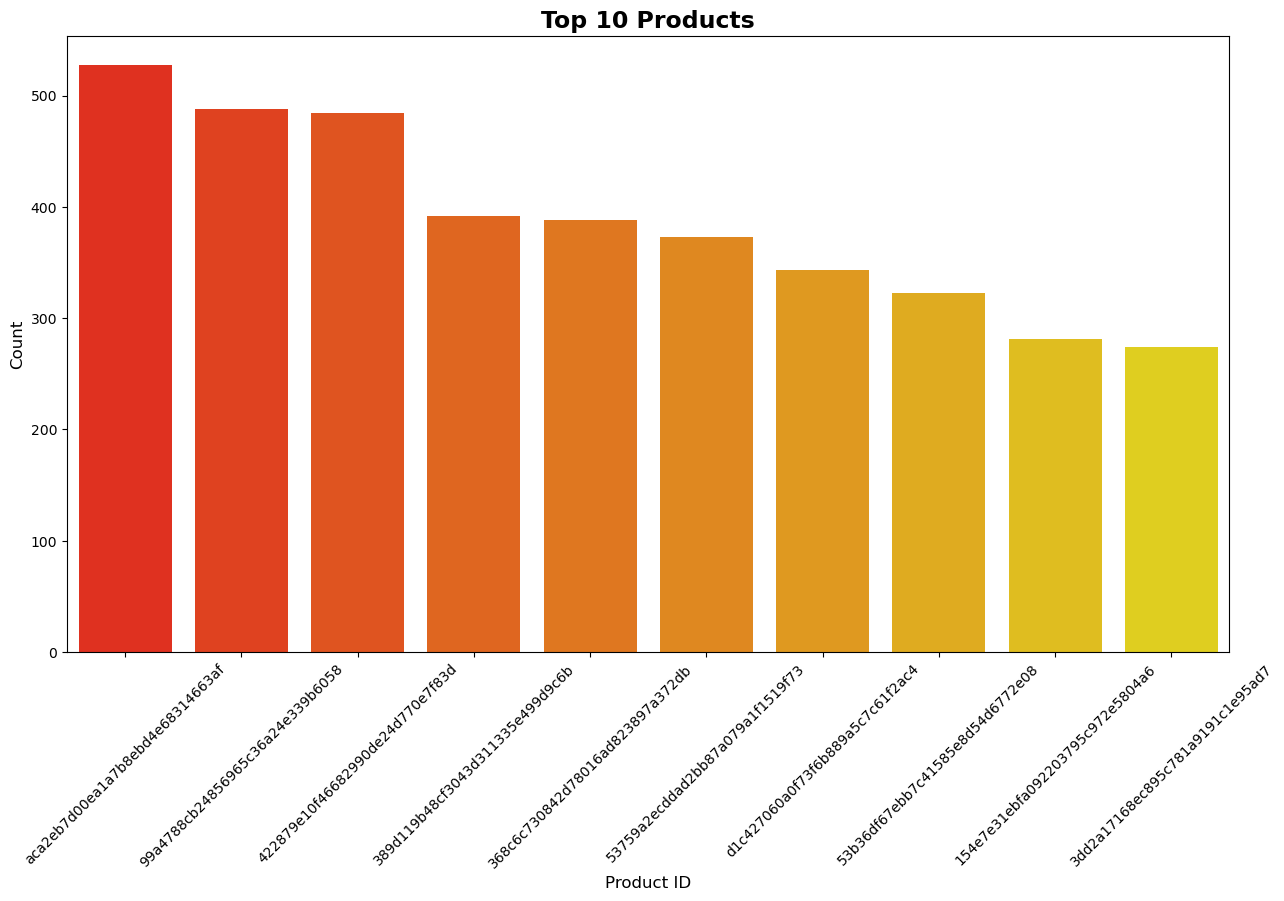

In [218]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Membaca data
product_orders = pd.read_csv("https://raw.githubusercontent.com/lmaoyups/bright/main/orders_dataset.csv")
order_items_df = pd.read_csv("https://raw.githubusercontent.com/lmaoyups/bright/main/order_items_dataset.csv")
products_df = pd.read_csv("https://raw.githubusercontent.com/lmaoyups/bright/main/products_dataset.csv")
product_orders = pd.merge(product_orders, order_items_df)
product_orders = pd.merge(product_orders, products_df, on="product_id")

# Menghitung top 10 produk
top_10_products = product_orders['product_id'].value_counts().head(10)

# Mengatur ukuran plot
plt.figure(figsize=(15, 8))

# Membuat plot countplot dengan seaborn
ax = sns.countplot(x='product_id', data=product_orders, palette='autumn',
                   order=top_10_products.index)\
                   .set_title("Top 10 Products", fontsize=17, weight='bold')

# Memutar label sumbu x
plt.xticks(rotation=45)

# Menambahkan label sumbu x dan sumbu y
plt.xlabel("Product ID", fontsize=12)
plt.ylabel("Count", fontsize=12)

# Menampilkan plot
plt.show()


In [219]:
product_orders.groupby(["product_category_name"])["product_id"].count().sort_values(ascending=False).head(10)


product_category_name
cama_mesa_banho           11115
beleza_saude               9670
esporte_lazer              8641
moveis_decoracao           8334
informatica_acessorios     7827
utilidades_domesticas      6964
relogios_presentes         5991
telefonia                  4545
ferramentas_jardim         4347
automotivo                 4235
Name: product_id, dtype: int64

Mengelompokkan data berdasarkan kolom "product_id_shorten" dan "product_category_name",  kemudian menghitung jumlah kemunculan setiap nilai dalam kolom "product_id_shorten" # Hasilnya diurutkan dari nilai tertinggi ke terendah, dan diambil 10 nilai teratas.

In [220]:
# Membaca file CSV yang berisi data penjual
sellers_data = pd.read_csv('https://raw.githubusercontent.com/lmaoyups/bright/main/sellers_dataset.csv')

# Menggabungkan data produk dengan data penjual berdasarkan kolom "seller_id"
seller_products = pd.merge(product_orders, sellers_data, on="seller_id")

# Menampilkan informasi mengenai data gabungan
seller_products.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 25 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       112650 non-null  object 
 1   customer_id                    112650 non-null  object 
 2   order_status                   112650 non-null  object 
 3   order_purchase_timestamp       112650 non-null  object 
 4   order_approved_at              112635 non-null  object 
 5   order_delivered_carrier_date   111456 non-null  object 
 6   order_delivered_customer_date  110196 non-null  object 
 7   order_estimated_delivery_date  112650 non-null  object 
 8   order_item_id                  112650 non-null  int64  
 9   product_id                     112650 non-null  object 
 10  seller_id                      112650 non-null  object 
 11  shipping_limit_date            112650 non-null  object 
 12  price                         

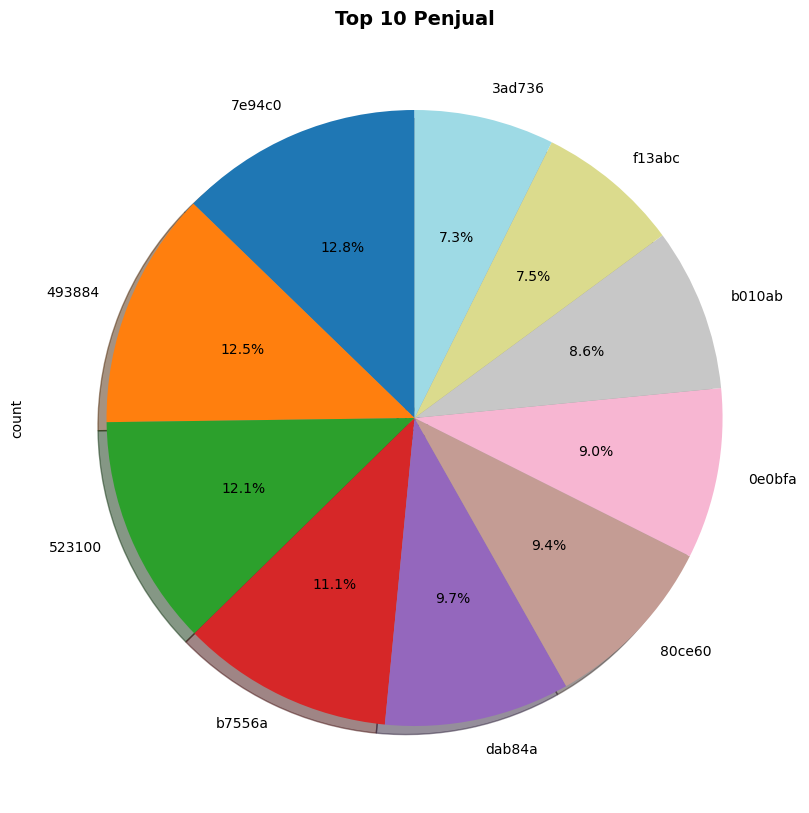

In [221]:
# Membuat kolom 'seller_id_shorten'
seller_products['seller_id_shorten'] = seller_products['seller_id'].str[-6:]

# Mengatur ukuran plot
plt.figure(figsize=(20, 10))

# Menghitung jumlah kemunculan setiap nilai dalam kolom 'seller_id_shorten', mengambil 10 nilai teratas, dan membuat pie plot
seller_products['seller_id_shorten'].value_counts()[:10].plot.pie(autopct='%1.1f%%',
        shadow=True, startangle=90, cmap='tab20')

# Menambahkan judul plot
plt.title("Top 10 Penjual", size=14, weight='bold')

# Menampilkan plot
plt.show()


In [222]:
seller_category = seller_products.groupby(['seller_id', 'product_category_name'])['seller_id'].count().sort_values(ascending=False).head(10)
seller_category

seller_id                         product_category_name
1f50f920176fa81dab994f9023523100  ferramentas_jardim       1882
6560211a19b47992c3666cc44a7e94c0  relogios_presentes       1628
4a3ca9315b744ce9f8e9374361493884  cama_mesa_banho          1572
1025f0e2d44d7041d6cf58b6550e0bfa  moveis_decoracao         1292
da8622b14eb17ae2831f4ac5b9dab84a  cama_mesa_banho          1277
7c67e1448b00f6e969d365cea6b010ab  moveis_escritorio        1233
ea8482cd71df3c1969d7b9473ff13abc  telefonia                1178
cc419e0650a3c5ba77189a1882b7556a  beleza_saude             1091
7a67c85e85bb2ce8582c35f2203ad736  cool_stuff               1069
4869f7a5dfa277a7dca6462dcf3b52b2  relogios_presentes       1002
Name: seller_id, dtype: int64

Mengelompokkan data berdasarkan ID penjual dan nama kategori produk, kemudian menghitung jumlah penjual dalam setiap kategori produk

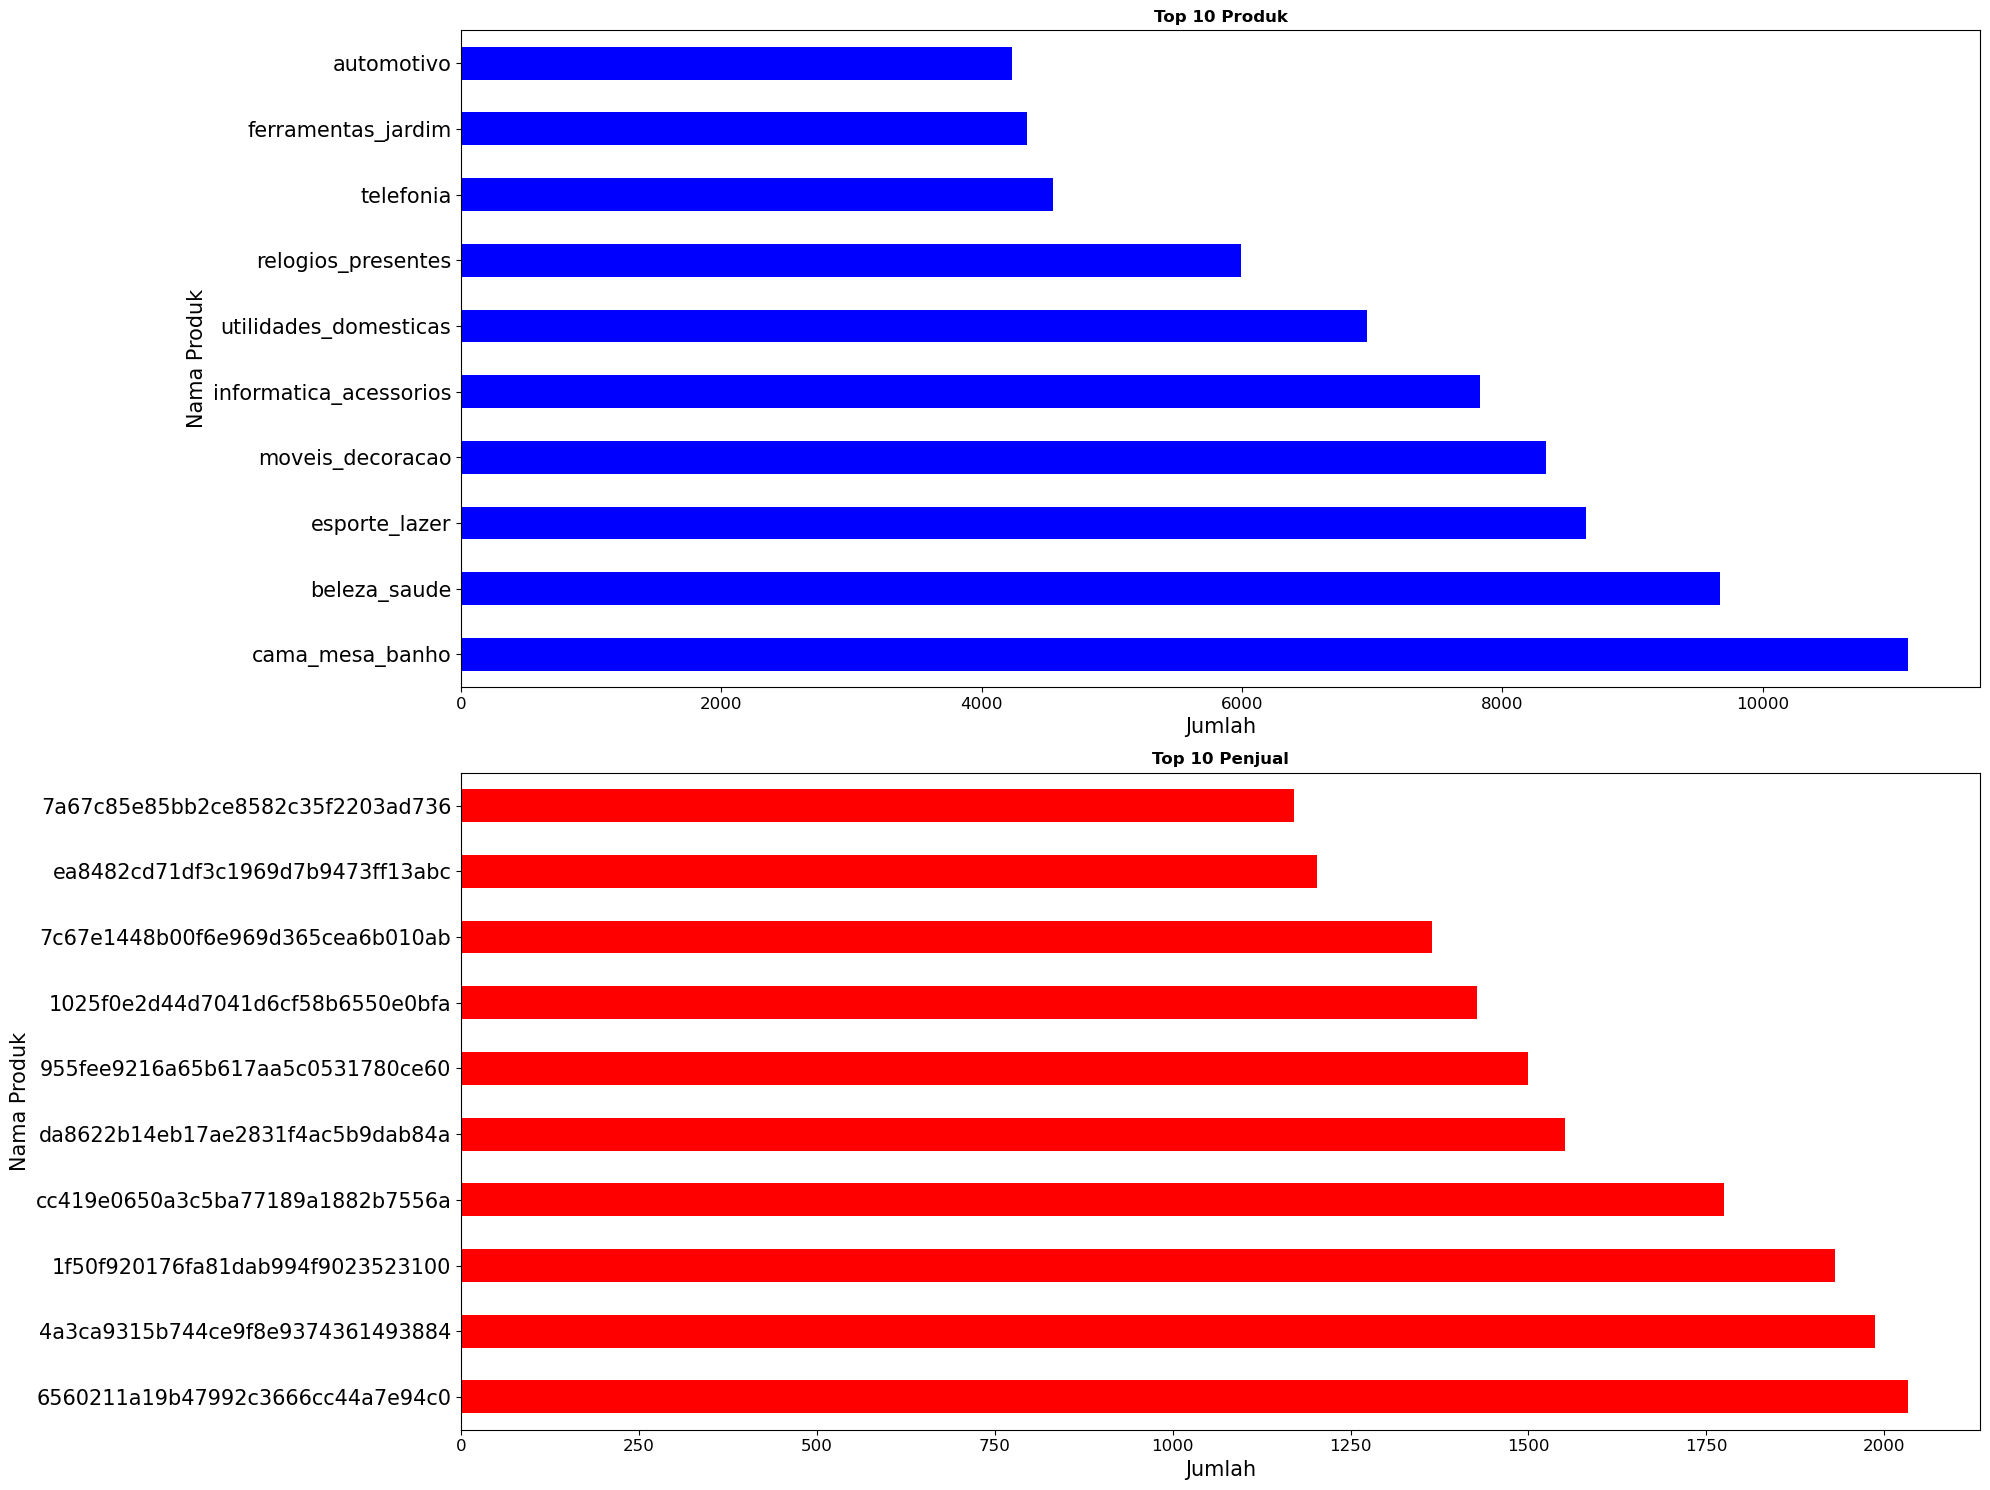

In [223]:
import matplotlib.pyplot as plt

# Menghitung jumlah produk terjual untuk setiap kategori
group_category = product_orders['product_category_name'].value_counts().head(10)

# Menghitung jumlah produk yang dijual oleh setiap penjual
seller_category = product_orders['seller_id'].value_counts().head(10)

# Membuat subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(20, 15))

# Plot untuk kategori produk
group_category.plot.barh(ax=ax1, color='blue')
ax1.set_title('Top 10 Produk', fontweight='bold')
ax1.set_xlabel('Jumlah', fontsize=15)
ax1.set_ylabel('Nama Produk', fontsize=15)
ax1.xaxis.set_tick_params(labelsize=12)
ax1.yaxis.set_tick_params(labelsize=15)

# Plot untuk top 10 penjual
seller_category.plot.barh(ax=ax2, color='red')
ax2.set_title('Top 10 Penjual', fontweight='bold')
ax2.set_xlabel('Jumlah', fontsize=15)
ax2.set_ylabel('Nama Produk', fontsize=15)
ax2.xaxis.set_tick_params(labelsize=12)
ax2.yaxis.set_tick_params(labelsize=15)

plt.tight_layout()
plt.show()


## Pertanyaan 2 : Bagaimana gambaran demografis dari basis pelanggan kami?

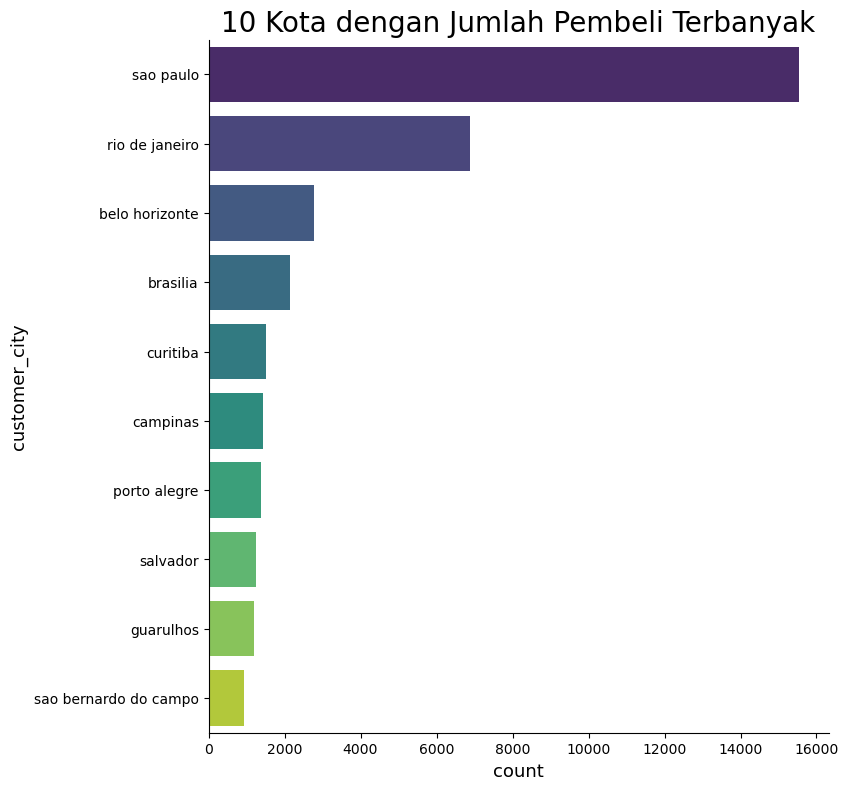

In [224]:
# Analisis 10 kota dengan jumlah pembeli terbanyak

# Persiapan data
customer_demographic = customers_df.groupby("customer_city")["customer_unique_id"].count().reset_index()
customer_demographic.columns = ["customer_city", "count"]
customer_demographic = customer_demographic.sort_values(by="count", ascending=False)

# Visualisasi profil demografis pelanggan

# Ambil 10 kota teratas
top_10_cities = customer_demographic.nlargest(10, "count")

plt.figure(figsize=(8, 9))

# Gunakan judul yang deskriptif dan tingkatkan ukuran fontnya
plt.title("10 Kota dengan Jumlah Pembeli Terbanyak", fontsize=20)

# Label sumbu dan tingkatkan ukuran fontnya
plt.xlabel("Jumlah Pembeli", fontsize=13)
plt.ylabel("Kota", fontsize=13)

# Gunakan palet warna yang menarik secara visual
sns.barplot(
    x="count",
    y="customer_city",
    data=top_10_cities,
    palette="viridis",  # Ubah palet warna untuk tampilan yang lebih menarik
)

# Hapus duri atas dan kanan untuk tampilan yang lebih bersih
sns.despine()

# Tingkatkan ukuran font label
plt.tick_params(labelsize=10)


In [225]:
bystate_df = all_data.groupby(by="customer_state").customer_id.nunique().reset_index()
bystate_df.rename(columns={
    "customer_id": "customer_count"
}, inplace=True)
bystate_df.head()

,customer_state,customer_count
0,AC,81
1,AL,413
2,AM,148
3,AP,68
4,BA,3380


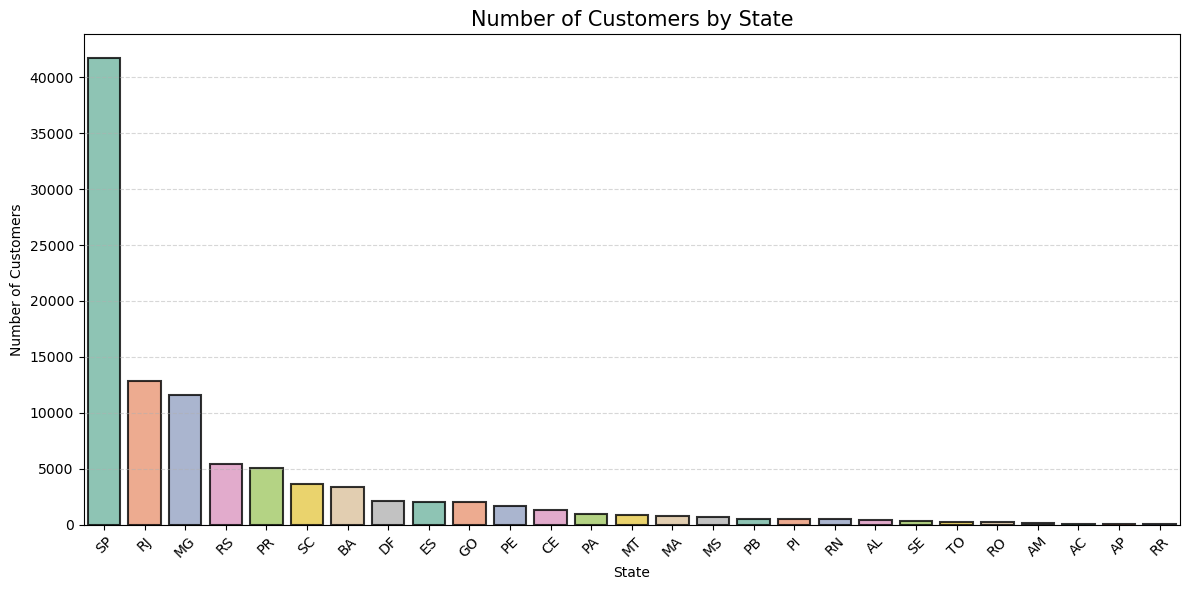

In [226]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

# Find the most common state
most_common_state = bystate_df.loc[bystate_df['customer_count'].idxmax(), 'customer_state']

# Sort the dataframe by customer count in descending order
bystate_df = bystate_df.sort_values(by='customer_count', ascending=False)

# Create the bar plot
sns.barplot(x='customer_state',
            y='customer_count',
            data=bystate_df,
            palette="Set2",  # Change the color palette
            edgecolor='black',  # Add edge color to bars
            linewidth=1.5,  # Adjust the width of the edge lines
            alpha=0.8  # Adjust the transparency of the bars
            )

# Set plot title and labels
plt.title("Number of Customers by State", fontsize=15)
plt.xlabel("State")
plt.ylabel("Number of Customers")
plt.xticks(fontsize=10, rotation=45)  # Rotate x-axis labels for better readability
plt.yticks(fontsize=10)  # Set font size for y-axis labels
plt.grid(axis='y', linestyle='--', alpha=0.5)  # Add grid lines to y-axis
plt.tight_layout()  # Adjust layout to prevent overlapping labels
plt.show()

# Conclusion

- Apa produk yang memiliki penjualan tertinggi ?
  > Grafik menunjukkan bahwa produk bed_bath_table adalah yang paling sering dibeli oleh pelanggan.
- Bagaimana gambaran demografis dari basis pelanggan kami?
  > Grafik di atas menunjukkan jumlah pesanan produk yang dibeli berdasarkan negara bagian. Berdasarkan hal tersebut, São Paulo memiliki angka tertinggi dan terdapat kesenjangan besar antara negara bagian lainnya.Adapun 10 kota dengan jumlah pelanggan terbanyak adalah:
  1. Sao Paulo
  2. Rio de Janeiro
  3. Belo Horizonte
  4. Brasilia
  5. Curitiba
  6. Kampina
  7. Porto Alegre
  8. Salvador
  9. Guarulho
  10. Niteroi
  > dan 10 negara bagian teratas dengan jumlah pelanggan terbanyak adalah:
  1. Sao Paulo
  2. Minas Gerair
  3. Rio de Janeiro
  4. Bahia
  5. Pernambuco
  6. Ceara
  7. Parana
  8. Rio Grande do Sul
  9. Santa Katarina
  10. Distrik Federalrik Federal